In [1]:
model_path = r"posenet_mobilenet_v1_100_257x257_multi_kpt_stripped.tflite"

body_parts = [ 
    "NOSE",
    "LEFT_EYE",
    "RIGHT_EYE",
    "LEFT_EAR",
    "RIGHT_EAR",
    "LEFT_SHOULDER",
    "RIGHT_SHOULDER",
    "LEFT_ELBOW",
    "RIGHT_ELBOW",
    "LEFT_WRIST",
    "RIGHT_WRIST",
    "LEFT_HIP",
    "RIGHT_HIP",
    "LEFT_KNEE",
    "RIGHT_KNEE",
    "LEFT_ANKLE",
    "RIGHT_ANKLE"
]

In [2]:
import numpy as np
import tensorflow as tf

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [7]:
import cv2
img = cv2.imread('sample.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

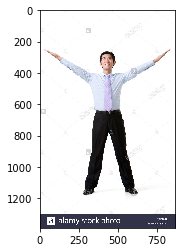

In [8]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [9]:
input_shape = tuple(input_details[0]['shape'][1:-1])

# scale to [-1, 1]
adjust_range = np.vectorize(lambda x: (x - 128)/128)
scaled = cv2.resize(img, input_shape)
scaled_normalized = adjust_range(scaled)
input_as_tensor = tf.convert_to_tensor(scaled_normalized.reshape(1, *scaled_normalized.shape), np.float32)

interpreter.set_tensor(input_details[0]['index'], input_as_tensor)
interpreter.invoke()

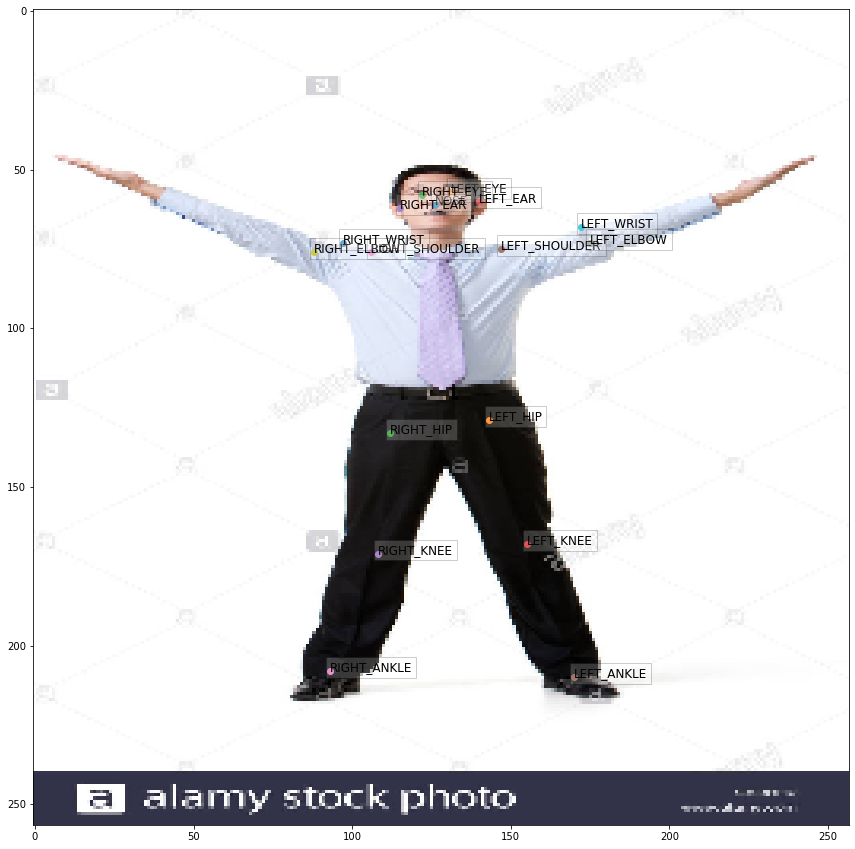

In [64]:
'''
Reference Code:
https://github.com/tensorflow/examples/blob/master/lite/examples/posenet/android/posenet/src/main/java/org/tensorflow/lite/examples/posenet/lib/Posenet.kt
'''
import pandas as pd
import numpy as np

plt.figure(figsize=(15,15))
plt.imshow(scaled)
heatmap = interpreter.get_tensor(output_details[0]['index'])
offsets = interpreter.get_tensor(output_details[1]['index'])

num_keypoints = heatmap.shape[-1]
img_height, img_width = scaled.shape[:-1]

df = pd.DataFrame(index=body_parts, columns=['x', 'y', 'confidence'])

for keypoint in range(num_keypoints):
    heatmap_for_keypoint = heatmap[0,:,:,keypoint]
    
    # Get index of max coords from heatmap
    i, j = np.unravel_index(heatmap_for_keypoint.argmax(), heatmap_for_keypoint.shape)
    
    sigmoid = lambda x: 1/(1 + np.exp(-x)) 
    confidence = sigmoid(heatmap[0, i, j, keypoint])
    
    y = i / (heatmap.shape[1] - 1) * img_height + offsets[0,i,j,keypoint]
    x = j / (heatmap.shape[2] - 1) * img_width + offsets[0,i,j,keypoint+num_keypoints]
    
    y = int(y)
    x = int(x)
    
    body_part = body_parts[keypoint]

    plt.text(x, y, body_part, bbox=dict(facecolor='white', alpha=0.2), fontsize=12)
    plt.scatter(x, y)
    df.loc[body_part] = (x, y, confidence)

In [65]:
df

,x,y,confidence
NOSE,126,61,0.999102
LEFT_EYE,131,57,0.995207
RIGHT_EYE,122,58,0.995489
LEFT_EAR,140,60,0.775638
RIGHT_EAR,115,62,0.838559
LEFT_SHOULDER,147,75,0.772939
RIGHT_SHOULDER,106,76,0.885122
LEFT_ELBOW,175,73,0.804321
RIGHT_ELBOW,88,76,0.57841
LEFT_WRIST,172,68,0.263682


In [73]:
# df.reset_index(inplace=True)
json_data = df.to_json(orient='index')

In [76]:
d = json.loads(json_data)
with open('sample_data.json', 'w') as fp:
    json.dump([d for _ in range(100)],fp)

In [67]:
import json
d = json.loads(json_data)
pd.DataFrame(d)

,x,y,confidence
NOSE,126,61,0.999102
LEFT_EYE,131,57,0.995207
RIGHT_EYE,122,58,0.995489
LEFT_EAR,140,60,0.775638
RIGHT_EAR,115,62,0.838559
LEFT_SHOULDER,147,75,0.772939
RIGHT_SHOULDER,106,76,0.885122
LEFT_ELBOW,175,73,0.804321
RIGHT_ELBOW,88,76,0.578410
LEFT_WRIST,172,68,0.263682


In [53]:
d

{'index': {'0': 'NOSE',
  '1': 'LEFT_EYE',
  '2': 'RIGHT_EYE',
  '3': 'LEFT_EAR',
  '4': 'RIGHT_EAR',
  '5': 'LEFT_SHOULDER',
  '6': 'RIGHT_SHOULDER',
  '7': 'LEFT_ELBOW',
  '8': 'RIGHT_ELBOW',
  '9': 'LEFT_WRIST',
  '10': 'RIGHT_WRIST',
  '11': 'LEFT_HIP',
  '12': 'RIGHT_HIP',
  '13': 'LEFT_KNEE',
  '14': 'RIGHT_KNEE',
  '15': 'LEFT_ANKLE',
  '16': 'RIGHT_ANKLE',
  '17': 'NOSE',
  '18': 'LEFT_EYE',
  '19': 'RIGHT_EYE',
  '20': 'LEFT_EAR',
  '21': 'RIGHT_EAR',
  '22': 'LEFT_SHOULDER',
  '23': 'RIGHT_SHOULDER',
  '24': 'LEFT_ELBOW',
  '25': 'RIGHT_ELBOW',
  '26': 'LEFT_WRIST',
  '27': 'RIGHT_WRIST',
  '28': 'LEFT_HIP',
  '29': 'RIGHT_HIP',
  '30': 'LEFT_KNEE',
  '31': 'RIGHT_KNEE',
  '32': 'LEFT_ANKLE',
  '33': 'RIGHT_ANKLE'},
 'x': {'0': None,
  '1': None,
  '2': None,
  '3': None,
  '4': None,
  '5': None,
  '6': None,
  '7': None,
  '8': None,
  '9': None,
  '10': None,
  '11': None,
  '12': None,
  '13': None,
  '14': None,
  '15': None,
  '16': None,
  '17': 126.0,
  '18': 131.0,
 